# Analysis of Microarray & Microtiter plates
Analysis of peptide-virus binding signals.

This notebook provides simple visualisation and analysis functions to work with experimental data sets from the FluType project.

In [67]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from flutype_analysis import analysis, utils, pca, correlation

In [68]:
data_ids = {'2017-05-12_MTP_R1',
            '2017-05-12_MTP_R1_div_back',
            'flutype_test',
            '2017-05-12_MTP_R1_sub_back', 
            'N10',
            "2017-05-19_N11_Cal", 
            'merge_2017-05-19_N11_Cal_N00010',
            '2017-05-19_N10_Pan'}

In [69]:
data_id = 'N00010'# carfull propabaly wrong labeling
directory = "../data/N00010" # carfull probably wrong labeling

##################################################################

#data_id = '2017-05-12_MTP_R1'
#data_id = '2017-05-12_MTP_R1_div_back'
#data_id = '2017-05-12_MTP_R1_sub_back'
#data_id = 'flutype_test'

#data_id = "2017-05-19_N11_Cal"
#directory = "../data/2017-05-19_N11_Cal"

#data_id = 'merge_2017-05-19_N11_Cal_N00010'
#directory ='../data/merge_2017-05-19_N11_Cal_N00010'





#data_id = '2017-05-19_N10_Pan'
#directory ='../data/2017-05-19_N10_Pan'


#data_id = "2017-05-19_N9_X31" 
#directory = "../data/2017-05-19_N9_X31" 
#data_id = "N9_N10_N11" 
#directory = "../data/N9_N10_N11" 

#data_id = "2017-05-19_E5_X31" 
#directory = "../data/2017-05-19_E5_X31"

data_id = "N9_N10_N11_E5_E6_N5_N6" 
directory = "../data/N9_N10_N11_E5_E6_N5_N6"

#data_id = "2017-05-19_N5_X31"
#directory = "../data/2017-05-19_N5_X31"

#data_id = "2017-05-19_E6_untenliegend_X31"
#directory = "../data/2017-05-19_E6_untenliegend_X31"

#data_id = "2017-05-19_N6_Pan"
#directory = "../data/2017-05-19_N6_Pan"


data = utils.load_data(data_id, directory)
ana = analysis.Analysis(data)




display(ana.spot.head(10))

--------------------------------------------------------------------------------
Loading data corresponding to data_id: <N9_N10_N11_E5_E6_N5_N6> in dir <../data/N9_N10_N11_E5_E6_N5_N6>
--------------------------------------------------------------------------------
Virus .gal:../data/N9_N10_N11_E5_E6_N5_N6/N9_N10_N11_E5_E6_N5_N6_vir.gal
Peptide .gal :../data/N9_N10_N11_E5_E6_N5_N6/N9_N10_N11_E5_E6_N5_N6_pep.gal
Meta  :../data/N9_N10_N11_E5_E6_N5_N6/N9_N10_N11_E5_E6_N5_N6.meta
Spot intensity file  :../data/N9_N10_N11_E5_E6_N5_N6/N9_N10_N11_E5_E6_N5_N6.csv
Image file  :../data/N9_N10_N11_E5_E6_N5_N6/N9_N10_N11_E5_E6_N5_N6_600_100_635.tif
Spot intensities for the data ID (N9_N10_N11_E5_E6_N5_N6) are not averaged but primary values


,Column,Row,Peptide,Referenz,Virus,Intensity,Std,Replica
0,1,1,Leuchtefix 1.0,True,X31,848828,NaN,0
1,1,2,blank,False,X31,3365,NaN,0
2,1,3,blank,False,X31,1005,NaN,1
3,1,4,blank,False,X31,2675,NaN,2
4,1,5,blank,False,X31,4187,NaN,3
5,1,6,blank,False,X31,3434,NaN,4
6,1,7,blank,False,X31,9398,NaN,5
7,1,8,Leuchtefix 1.0,True,X31,929183,NaN,1
8,1,9,blank,False,X31,5070,NaN,6
9,1,10,blank,False,X31,3835,NaN,7


## Heatmap of array/plate with peptide and virus information

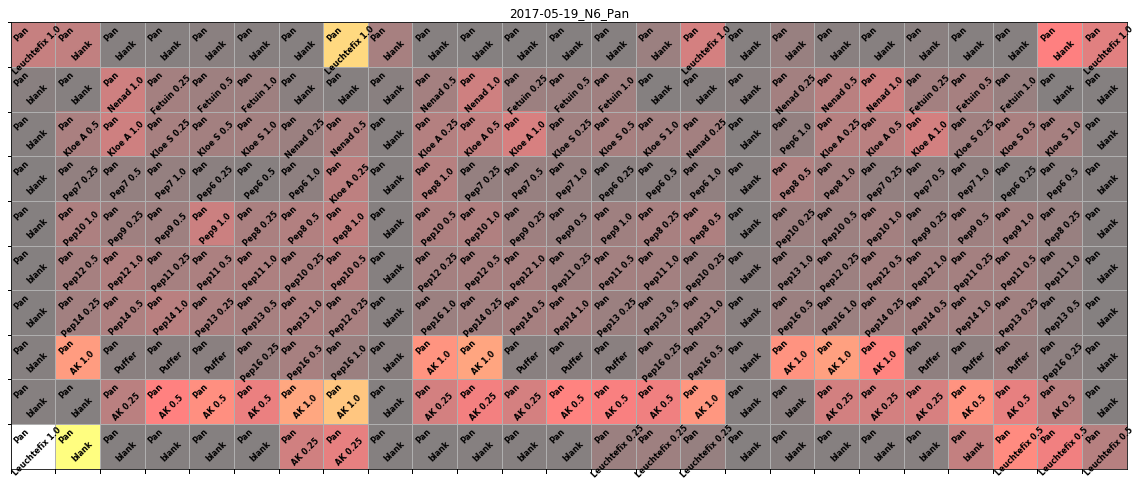

In [51]:
# shows figure
fig = ana.heatmap(figsize=(20,10))

plt.title(data_id,fontsize="large")

utils.assure_path_exists("../results/"+data_id+"/")
fig.savefig("../results/{}/{}_heatmap1.png".format(data_id,data_id),bbox_inches='tight')
plt.show()

## Heatmap mini

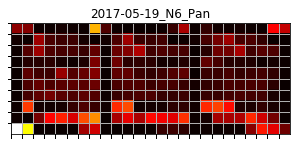

In [52]:
#fig = Ana.heatmap(descript=False,nrows=1,ncols=1,figsize=(5,2.5))
fig = ana.heatmap(descript=False,figsize=(5,2.5))
plt.title(data_id,fontsize="large")
plt.show()
utils.assure_path_exists("../results/"+data_id+"/")

fig.savefig("../results/{}/{}_heatmap2.png".format(data_id,data_id),bbox_inches='tight')

## Only description

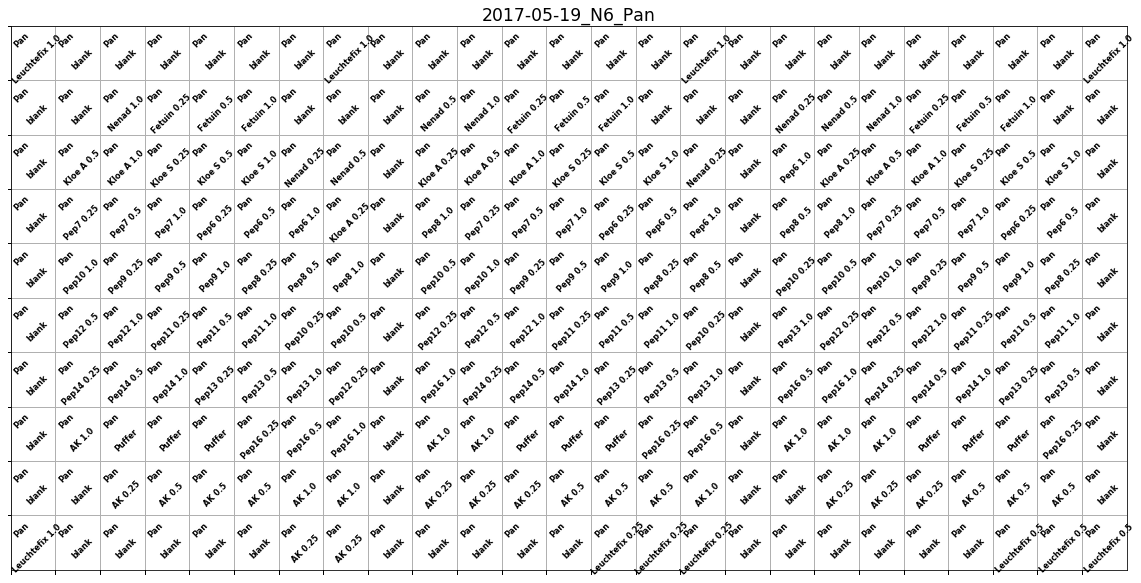

In [53]:
fig = ana.heatmap(heatmap=False,figsize=(20,10))
plt.title(data_id,fontsize="xx-large")
plt.show()

## Barplot aligned to peptides

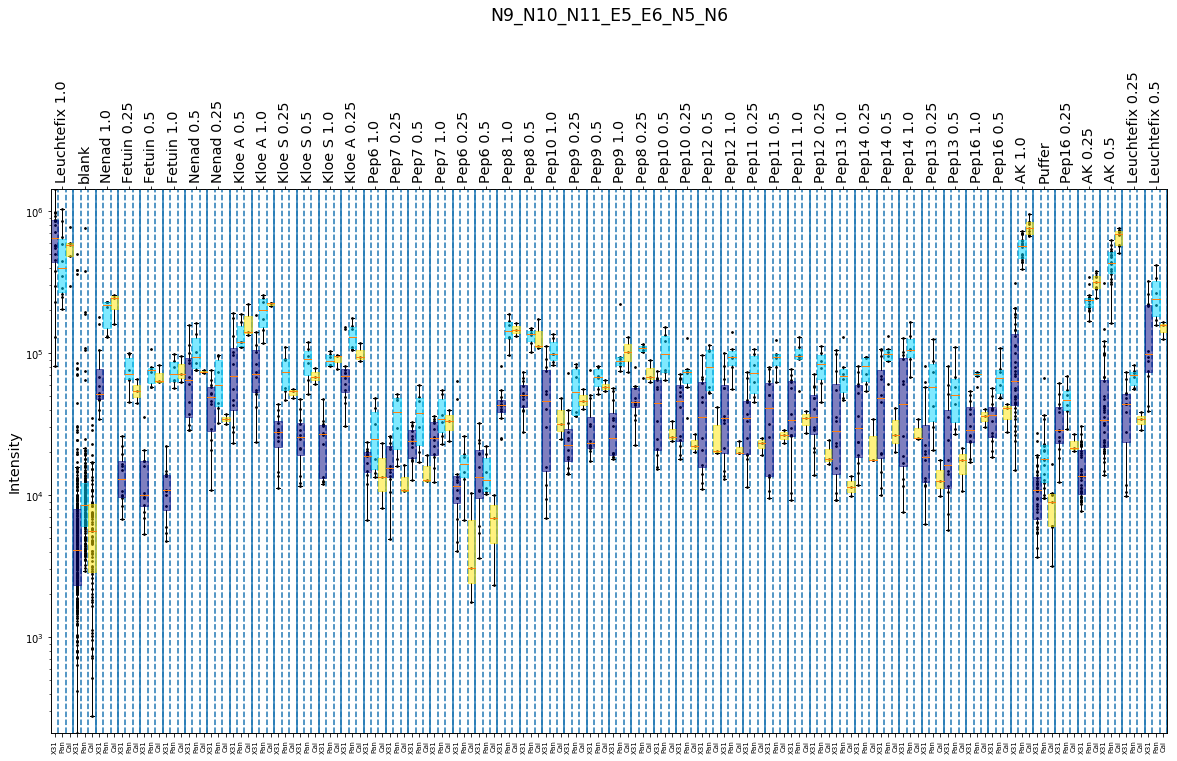

In [70]:
fig = ana.barplot(scale="log",figsize=(20,10))
plt.title(data_id,y=1.30,fontsize="xx-large")
utils.assure_path_exists("../results/"+data_id+"/")
fig.savefig("../results/{}/{}_barplot_pep.png".format(data_id,data_id),bbox_inches='tight')
plt.show()

## Barplot aligned to virus

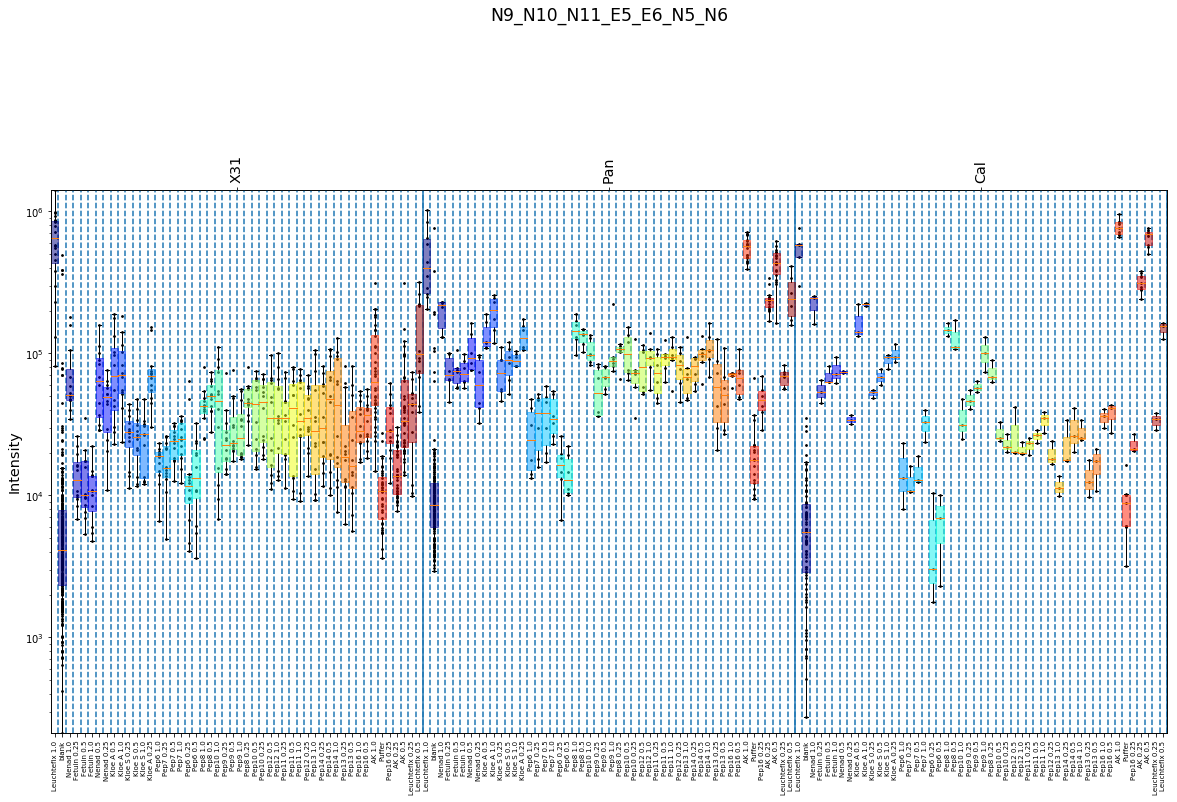

In [71]:
fig = ana.barplot(scale="log",align="vir",figsize=(20,10))
plt.title(data_id,y=1.30,fontsize="xx-large")
utils.assure_path_exists("../results/"+data_id+"/")
fig.savefig("../results/{}/{}_barplot_vir.png".format(data_id,data_id),bbox_inches='tight')
plt.show()

## PCA 2D Plot

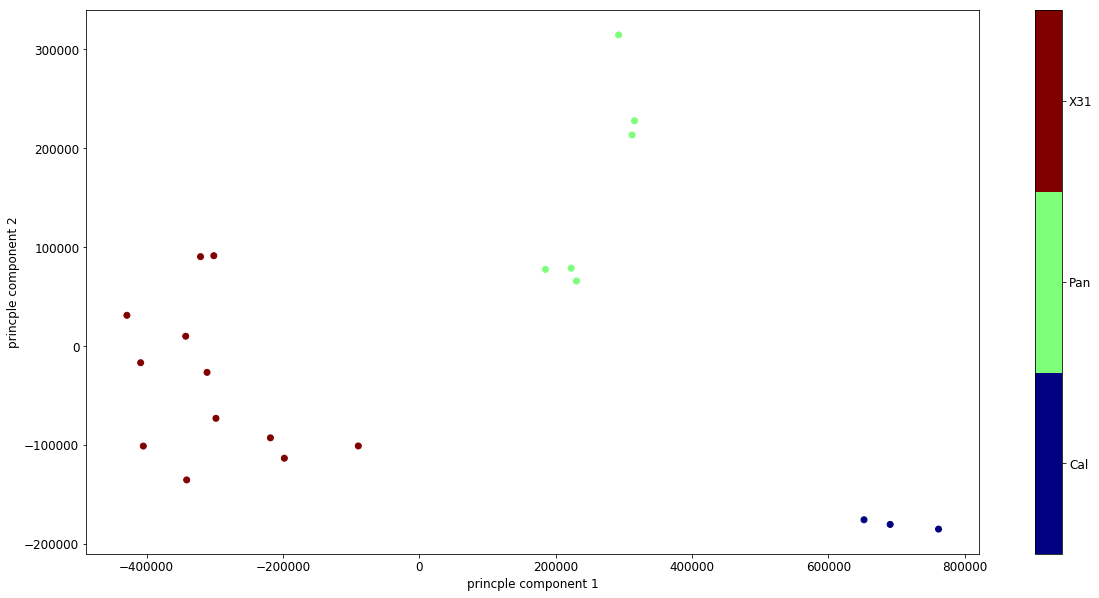

In [72]:
data_pca = ana.pca()
fig = pca.pca_2dplot(data_pca[0],figsize=(20,10))
utils.assure_path_exists("../results/"+data_id+"/")
fig.savefig("../results/{}/{}_pca.png".format(data_id,data_id),bbox_inches='tight')
plt.show()

## Correlation Plot

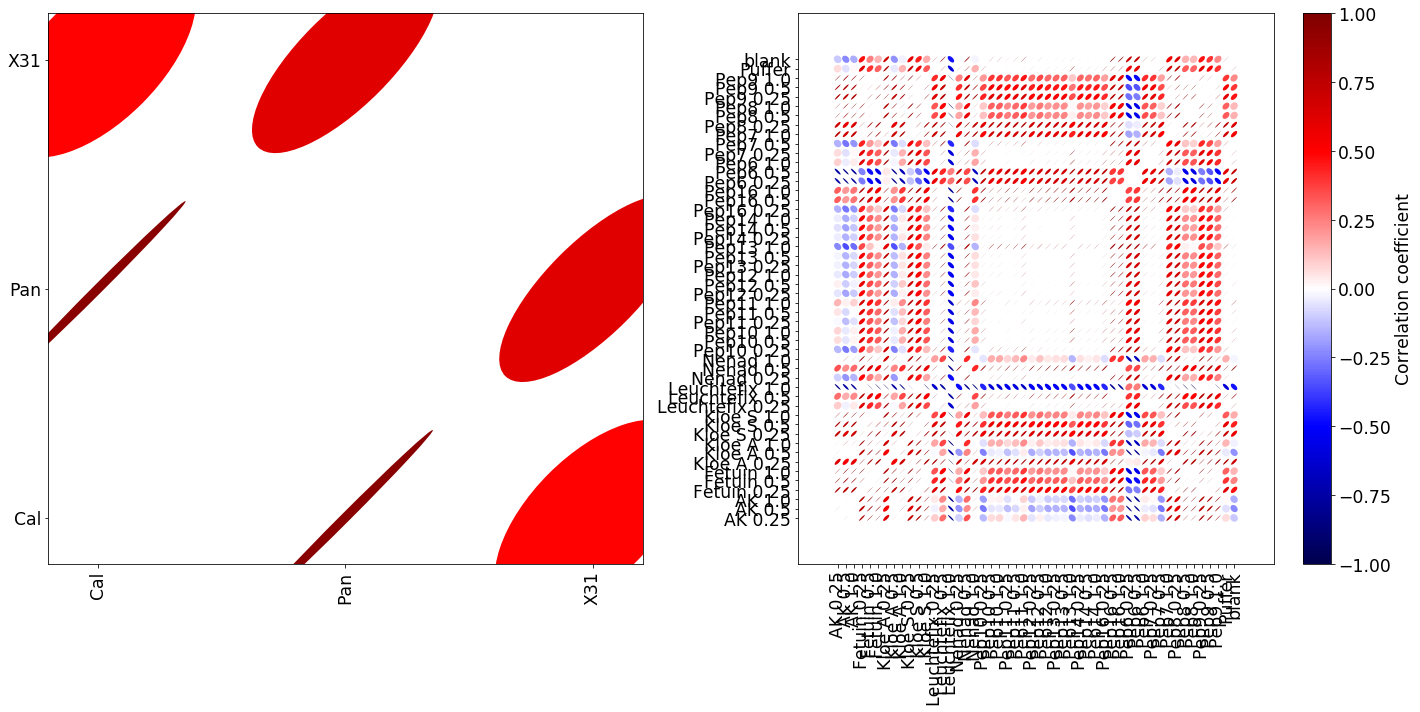

In [73]:
fig = ana.correlation_plot(type="both",figsize=(20,10))
fig.savefig("../results/{}/{}_corr_matrix_plot.png".format(data_id,data_id),bbox_inches='tight')
plt.show()